In [78]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import nilearn.image, nilearn.masking, nilearn.plotting
import numpy as np
import pandas as pd
import scipy.stats, scipy.io
import seaborn as sns
import pickle
import os
import subprocess
import re

In [57]:
subj_list = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44',
    'GB01', 'GB02', 'GB05', 'GB07', 'GB08', 'GB11', 'GB12', 'GB13', 'GB14', 'GB15',
    'GB18', 'GB19', 'GB20', 'GB21', 'GB23', 'GB26', 'GB27', 'GB28', 'GB29', 'GB30',
    'GB31', 'GB32', 'GB33', 'GB34', 'GB35', 'GB36', 'GB37', 'GB38', 'GB42', 'GB44'
]

In [3]:
data_dir = '/Volumes/clmnlab/GA/fmri_data/glm_results/MO_errts/'
#data_dir = '/clmnlab/GA/fmri_data/glm_results/MO_errts/'

In [61]:
#roi_imgs = {}
roi_names = []
roi_paths = []

module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    fnames = glob.glob('/Volumes/clmnlab/GA/fmri_data/masks/DMN/%s_*.nii' % (name))
    
    for fname in fnames:
        roi_paths.append(fname)
        roi_name = fname.replace('/Volumes/clmnlab/GA/fmri_data/masks/DMN/', '').replace('.nii', '')
        #roi_imgs[roi_name] = nilearn.image.load_img(fname)
        roi_names.append(roi_name)
        
roi_path = sorted(glob.glob('/Volumes/clmnlab/GA/fmri_data/masks/localizer/n200_c1*.nii'))

for path in roi_path:
    roi_paths.append(path)
    roi_name = path.split('/')[-1].replace('_mask.nii', '')
    #roi_imgs[roi_name] = (nilearn.image.load_img(path))
    roi_names.append(roi_name)

roi_info = pd.read_csv('/Volumes/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv')

for _, row in roi_info.iterrows():
    if row['yeo_17network'] in {1, 2}:
        #roi_imgs[row['region']] = nilearn.image.load_img('/Volumes/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
        roi_paths.append('/Volumes/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
        roi_names.append(row['region'])

In [60]:
#roi_imgs = {}
# roi_names = []
# roi_paths = []

# module_names = ['Core', 'dMsub', 'MTLsub']

# for name in module_names:
#     fnames = glob.glob('/clmnlab/GA/fmri_data/masks/DMN/%s_*.nii' % (name))
    
#     for fname in fnames:
#         roi_paths.append(fname)
#         roi_name = fname.replace('/clmnlab/GA/fmri_data/masks/DMN/', '').replace('.nii', '')
#         #roi_imgs[roi_name] = nilearn.image.load_img(fname)
#         roi_names.append(roi_name)
        
# roi_path = sorted(glob.glob('/clmnlab/GA/fmri_data/masks/localizer/n200_c1*.nii'))

# for path in roi_path:
#     roi_paths.append(path)
#     roi_name = path.split('/')[-1].replace('_mask.nii', '')
#     #roi_imgs[roi_name] = (nilearn.image.load_img(path))
#     roi_names.append(roi_name)

# roi_info = pd.read_csv('/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv')

# for _, row in roi_info.iterrows():
#     if row['yeo_17network'] in {1, 2}:
#         #roi_imgs[row['region']] = nilearn.image.load_img('/Volumes/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
#         roi_paths.append('/clmnlab/GA/fmri_data/masks/Fan/Fan280/fan.roi.resam.%.3d.nii' % (row['label']))
#         roi_names.append(row['region'])

FileNotFoundError: [Errno 2] File b'/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv' does not exist: b'/clmnlab/GA/fmri_data/masks/Fan/20190926/fan_cluster_net_20191010.csv'

In [66]:
roi_names

['Core_aMPFC_r',
 'Core_aMPFC_l',
 'Core_PCC_l',
 'Core_PCC_r',
 'dMsub_TempP_l_temp',
 'dMsub_LTC_l',
 'dMsub_TPJ_r',
 'dMsub_LTC_r',
 'dMsub_TempP_r_temp',
 'dMsub_dMPFC',
 'dMsub_TPJ_l',
 'MTLsub_PHC_r',
 'MTLsub_vMPFC',
 'MTLsub_Rsp_l',
 'MTLsub_Rsp_r',
 'MTLsub_HF_l',
 'MTLsub_PHC_l',
 'MTLsub_pIPL_l',
 'MTLsub_pIPL_r',
 'MTLsub_HF_r',
 'n200_c1_L_Postcentral',
 'FuG_L_3_2',
 'FuG_R_3_2',
 'PhG_L_6_6',
 'PhG_R_6_6',
 'PCun_L_4_3',
 'PCun_R_4_3',
 'MVOcC_L_5_1',
 'MVOcC_R_5_1',
 'MVOcC_L_5_2',
 'MVOcC_R_5_2',
 'MVOcC_L_5_3',
 'MVOcC_R_5_3',
 'MVOcC_L_5_4',
 'MVOcC_R_5_4',
 'MVOcC_L_5_5',
 'MVOcC_R_5_5',
 'LOcC_L_4_1',
 'LOcC_R_4_1',
 'LOcC_L_4_3',
 'LOcC_R_4_3',
 'LOcC_L_4_4',
 'LOcC_R_4_4',
 'LOcC_L_2_1',
 'LOcC_R_2_1',
 'LOcC_L_2_2']

In [6]:
roi_paths

['/Volumes/clmnlab/GA/fmri_data/masks/DMN/Core_aMPFC_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/Core_aMPFC_l.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/Core_PCC_l.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/Core_PCC_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_TempP_l_temp.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_LTC_l.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_TPJ_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_LTC_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_TempP_r_temp.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_dMPFC.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/dMsub_TPJ_l.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/MTLsub_PHC_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/MTLsub_vMPFC.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/MTLsub_Rsp_l.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/MTLsub_Rsp_r.nii',
 '/Volumes/clmnlab/GA/fmri_data/masks/DMN/MTLsub_HF_l.nii',
 '/Volumes/clmnlab/GA/

In [65]:
roi_paths_server = [item.replace('/Volumes','') for item in roi_paths]
roi_paths_server

['/clmnlab/GA/fmri_data/masks/DMN/Core_aMPFC_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/Core_aMPFC_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/Core_PCC_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/Core_PCC_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_TempP_l_temp.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_LTC_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_TPJ_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_LTC_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_TempP_r_temp.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_dMPFC.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/dMsub_TPJ_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_PHC_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_vMPFC.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_Rsp_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_Rsp_r.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_HF_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_PHC_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_pIPL_l.nii',
 '/clmnlab/GA/fmri_data/masks/DMN/MTLsub_pI

In [58]:
roi_info = list(zip(roi_names, roi_paths))

In [55]:
delimiters = "]\\n\\t\\t\\t", "\\n"
regexPattern = '|'.join(map(re.escape, delimiters))

time_series_mean = {}

for subj in subj_list:
    subj_dir = '%s%s' % (data_dir, subj)
    os.chdir(subj_dir)
        
    for run in range(1, 7):
        data_input = 'bp_demean.errts.MO.%s.r0%d+tlrc' % (subj, run)
        
        for roi_name, roi_path in roi_info:
            raw_txt = []
            data_output = 'bp_demean.errts.MO.%s.r0%d.%s.1D' % (subj, run, roi_name)
            
            command = '3dROIstats -mask %s -1Dformat %s' % (roi_path, data_input)
            command = command.split(" ")
            raw_txt = str(subprocess.check_output(command))
            final_txt = re.split(regexPattern, raw_txt)
            final_txt = final_txt[3::2]
            
            with open(data_output, 'w') as f:
                for idx, value in list(enumerate(final_txt)):
                    time_series_mean[subj, run, idx, roi_name] = float(value)
                    f.write("%s\n" % value)

In [56]:
time_series_mean

{('GA01', 1, 0, 'Core_aMPFC_r'): -51.942413,
 ('GA01', 1, 1, 'Core_aMPFC_r'): -70.634275,
 ('GA01', 1, 2, 'Core_aMPFC_r'): -88.614887,
 ('GA01', 1, 3, 'Core_aMPFC_r'): -105.06094,
 ('GA01', 1, 4, 'Core_aMPFC_r'): -119.215816,
 ('GA01', 1, 5, 'Core_aMPFC_r'): -130.425163,
 ('GA01', 1, 6, 'Core_aMPFC_r'): -138.183873,
 ('GA01', 1, 7, 'Core_aMPFC_r'): -142.153228,
 ('GA01', 1, 8, 'Core_aMPFC_r'): -142.196488,
 ('GA01', 1, 9, 'Core_aMPFC_r'): -138.359196,
 ('GA01', 1, 10, 'Core_aMPFC_r'): -130.889492,
 ('GA01', 1, 11, 'Core_aMPFC_r'): -120.196039,
 ('GA01', 1, 12, 'Core_aMPFC_r'): -106.849405,
 ('GA01', 1, 13, 'Core_aMPFC_r'): -91.517163,
 ('GA01', 1, 14, 'Core_aMPFC_r'): -74.947036,
 ('GA01', 1, 15, 'Core_aMPFC_r'): -57.909469,
 ('GA01', 1, 16, 'Core_aMPFC_r'): -41.160601,
 ('GA01', 1, 17, 'Core_aMPFC_r'): -25.394034,
 ('GA01', 1, 18, 'Core_aMPFC_r'): -11.21224,
 ('GA01', 1, 19, 'Core_aMPFC_r'): 0.911804,
 ('GA01', 1, 20, 'Core_aMPFC_r'): 10.646617,
 ('GA01', 1, 21, 'Core_aMPFC_r'): 17.81

In [67]:
with open(data_dir + 'GA_MO_errts_timeseriesmean.pickle', 'rb') as handle:
    tsmean_GA = pickle.load(handle)

In [68]:
with open(data_dir + 'GB_MO_errts_timeseriesmean.pickle', 'rb') as handle:
    tsmean_GB = pickle.load(handle)

In [80]:
len([tsmean_GA[('GA01', 1, x, 'Core_aMPFC_r')] for x in range(1096)])

1096

In [82]:
tsmean_GA.update(tsmean_GB)

In [88]:
tsmean = tsmean_GA
tsmean[('GB44', 1, 0, 'Core_aMPFC_r')]

-12.653521

In [89]:
corr_matrix = {}

for subj in subj_list:
    for run in range(1, 7):
        temp_matrix = np.zeros((len(roi_names), len(roi_names)))
                
        for i, to_roi in enumerate(roi_names):
            for j, from_roi in enumerate(roi_names):
                from_roi_data = [tsmean[(subj, run, x, from_roi)] for x in range(1096)]
                to_roi_data = [tsmean[(subj, run, x, to_roi)] for x in range(1096)]
                coef, p = scipy.stats.pearsonr(from_roi_data, to_roi_data)
                temp_matrix[i, j] = coef

        corr_matrix[subj, run] = temp_matrix

    print(subj, run, end='\r')

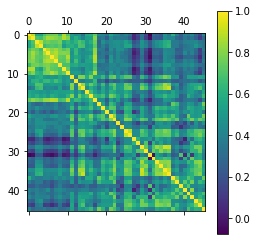

In [93]:
plt.matshow(corr_matrix[('GA01', 1)])
plt.colorbar()

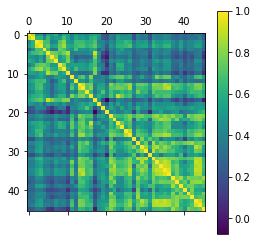

In [94]:
plt.matshow(corr_matrix[('GB44', 6)])
plt.colorbar()

In [95]:
corr_matrix_file = data_dir + '20200204_bp_demean_errts_MO_corr_matrix.pkl'
with open(corr_matrix_file, 'wb') as file:
    pickle.dump(file=file, obj=corr_matrix)

In [96]:
corr_matrix_mat = {subj: np.zeros((6, len(roi_names), len(roi_names))) for subj in subj_list}

for (subj, run), values in corr_matrix.items():
    corr_matrix_mat[subj][run-1, :, :] = values

corr_matrix_mat_file = data_dir + '20200204_bp_demean_errts_MO_corr_matrix.mat'
scipy.io.savemat(corr_matrix_mat_file, corr_matrix_mat)

In [72]:
for subj in subj_list:
    subj_dir = '%s%s' % (data_dir, subj)
    os.chdir(subj_dir)
    
    for run in range(1, 7):
        data_input_img = 'bp_demean.errts.MO.%s.r0%d+tlrc' % (subj, run)
        
        for roi_name, roi_path in roi_info:
            data_input_1D = 'bp_demean.errts.MO.%s.r0%d.%s.1D' % (subj, run, roi_name)
            data_output = 'bp_demean.errts.MO.corrR.%s.r0%d.%s.nii.gz' % (subj, run, roi_name)
            command = '3dTcorr1D -pearson -prefix %s %s %s' % (data_output, data_input_img, data_input_1D)
            command = command.split(" ")
            p = Popen(command, stdout=PIPE)
            print(p.communicate())

ValueError: too many values to unpack (expected 2)